# Natural Language Processing

### 2.1 Distributional Semantics, Latent Semantic Analysis and Word2Vec
<br><br>

In this tutorial, we will cover:

- How to use Gensim
- LSA
- word2vec

Prerequisites:

- Python
- numpy

#### Authors
TA: Robert Adrian Minut

Prof. Iacopo Masi and Prof. Stefano Faralli


In [ ]:
# @title Requirements
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import requests
import random
import scipy
import io
import sklearn
pd.set_option('display.colheader_justify', 'center')
random.seed(0)

In [ ]:
# @title Utility Functions
import matplotlib
%matplotlib inline
#plt.style.use('seaborn-whitegrid')

# Aux functions

from google.colab import output
output.enable_custom_widget_manager()

def plot_grid(Xs, Ys, axs=None):
    ''' Aux function to plot a grid'''
    t = np.arange(Xs.size) # define progression of int for indexing colormap
    if axs:
        axs.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        axs.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        axs.axis('scaled') # axis scaled
    else:
        plt.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        plt.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        plt.axis('scaled') # axis scaled

def linear_map(A, Xs, Ys):
    '''Map src points with A'''
    # [NxN,NxN] -> NxNx2 # add 3-rd axis, like adding another layer
    src = np.stack((Xs,Ys), axis=Xs.ndim)
    # flatten first two dimension
    # (NN)x2
    src_r = src.reshape(-1,src.shape[-1]) #ask reshape to keep last dimension and adjust the rest
    # 2x2 @ 2x(NN)
    dst = A @ src_r.T # 2xNN
    #(NN)x2 and then reshape as NxNx2
    dst = (dst.T).reshape(src.shape)
    # Access X and Y
    return dst[...,0], dst[...,1]


def plot_points(ax, Xs, Ys, col='red', unit=None, linestyle='solid'):
    '''Plots points'''
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='gray', linestyle="--")
    ax.axvline(x=0, color='gray',  linestyle="--")
    ax.plot(Xs, Ys, color=col)
    if unit is None:
        plotVectors(ax, [[0,1],[1,0]], ['gray']*2, alpha=1, linestyle=linestyle)
    else:
        plotVectors(ax, unit, [col]*2, alpha=1, linestyle=linestyle)

def plotVectors(ax, vecs, cols, alpha=1, linestyle='solid'):
    '''Plot set of vectors.'''
    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        ax.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha, linestyle=linestyle, linewidth=2)

## My own latex definitions

$$\def\mbf#1{\mathbf{#1}}$$
$$\def\bmf#1{\boldsymbol{#1}}$$
$$\def\bx{\mbf{x}}$$
$$\def\bxt#1{\mbf{x}_{\text{#1}}}$$
$$\def\bv{\mbf{v}}$$
$$\def\bz{\mbf{z}}$$
$$\def\bmu{\bmf{\mu}}$$
$$\def\bsigma{\bmf{\Sigma}}$$
$$\def\Rd#1{\in \mathbb{R}^{#1}}$$
$$\def\chain#1#2{\frac{\partial #1}{\partial #2}}$$
$$\def\loss{\mathcal{L}}$$

# Gensim: Topic Modeling and Document Similarity Library

**Gensim** is a Python library designed for efficient and scalable natural language processing (NLP) tasks, specifically for **topic modeling**, **document similarity analysis**, and **word embedding**. It is widely used for handling large text corpora, providing various algorithms and tools to process raw, unstructured text data into useful insights.

### Features of Gensim

- **Topic Modeling**: Implements popular algorithms like LDA (Latent Dirichlet Allocation), HDP (Hierarchical Dirichlet Process), and others for discovering hidden topics in a collection of documents.
  
- **Document Similarity**: Measures similarity between documents or chunks of texts based on pre-trained models.

- **Word Embeddings**: Supports popular word embedding techniques such as Word2Vec, FastText, and Doc2Vec to represent words and documents as dense vectors.

- **Scalability**: Efficient and scalable, Gensim can handle large datasets in a memory-efficient way, working seamlessly with disk-based storage to process large corpora.

### Gensim Architecture Overview

![Gensim Architecture](https://radimrehurek.com/gensim/_images/gensim_logo_positive_complete_tb.png)

The architecture of Gensim allows easy transformation of raw texts into structured models that can be analyzed further. The process starts from **text preprocessing**, followed by building corpora and applying **topic models** like LDA or **word embeddings** like Word2Vec.

### Use Cases

1. **Topic Modeling**: Extracts hidden themes from a set of texts.
   - Example: Understanding the major topics discussed in research papers or news articles.
  
2. **Document Similarity**: Measures how similar two or more documents are.
   - Example: Recommending articles based on a reader's previous reading history.

3. **Word Embeddings**: Learn dense vector representations for words.
   - Example: Capturing word relationships (e.g., `king - man + woman = queen`).

### Example Code

```python
import gensim
from gensim import corpora
from gensim.models import LdaModel

# Sample corpus
texts = [['human', 'interface', 'computer'],
         ['survey', 'user', 'computer', 'system', 'response', 'time'],
         ['eps', 'user', 'interface', 'system'],
         ['system', 'human', 'system', 'eps']]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda = LdaModel(corpus, num_topics=2, id2word=dictionary)
topics = lda.print_topics(num_words=4)
print(topics)
```

For more information see

https://radimrehurek.com/gensim/auto_examples/index.html#documentation

# Latent Semantic Analysis (LSA)

Let us work with some small dataset

# `fetch_20newsgroups` Dataset from Scikit-Learn

The `fetch_20newsgroups` dataset is a popular benchmark dataset for text classification, particularly used in machine learning and NLP tasks. It contains approximately 20,000 newsgroup documents categorized into 20 different topics. Each document in the dataset is a news article, which makes it an ideal dataset for practicing classification algorithms like Naive Bayes, Support Vector Machines (SVMs), and neural networks.

### Features of the Dataset

- **Text Data**: The dataset consists of plain-text documents from 20 different newsgroups, making it perfect for text classification tasks.
  
- **20 Categories**: The dataset is divided into 20 different categories, such as `comp.graphics`, `sci.space`, `talk.politics.mideast`, etc.

- **Train/Test Split**: The dataset can be loaded in a train-test split, enabling quick experimentation with classification algorithms.

- **Preprocessing**: The dataset provides options to include or exclude metadata such as headers, footers, and quotes from the newsgroup posts.

### Categories in the Dataset

The 20 categories in the dataset are:

1. `alt.atheism`
2. `comp.graphics`
3. `comp.os.ms-windows.misc`
4. `comp.sys.ibm.pc.hardware`
5. `comp.sys.mac.hardware`
6. `comp.windows.x`
7. `misc.forsale`
8. `rec.autos`
9. `rec.motorcycles`
10. `rec.sport.baseball`
11. `rec.sport.hockey`
12. `sci.crypt`
13. `sci.electronics`
14. `sci.med`
15. `sci.space`
16. `soc.religion.christian`
17. `talk.politics.guns`
18. `talk.politics.mideast`
19. `talk.politics.misc`
20. `talk.religion.misc`

We will use just 4 categories. Treat them as latent topics!

```python
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
```

In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

# Let's look at the data

- Newsgroup text from the '90s (internet was not there yet)
- We have the **categories** but $\underline{\text{we set them aside from the algorithm}}$
- We assume **we do NOT know the categories of the text**
    - We seek to recover them in an unsupervised way
Categories are `{{newsgroups_train.target_names}}`

```python
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)
```

# To install gensim run one of the two commands below
```bash
! pip install gensim==4.3
```

In [ ]:
! pip install gensim==4.3

### **EXERCISE 1** 💻
Print the first three sentences of the dataset in the training set where each  sentence is separated by a newline 50 '==' chars and another new  line

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution
print(*newsgroups_train.data[:3], sep='\n'+'=='*50+'\n')

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

# From raw text to Term-Document Matrix

### **EXERCISE 2** 💻
Use `sklearn` to compute the Term-Document Matrix and print the size of:

- Documents
- Vocabulary

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(newsgroups_train.data)
dims = X_train_counts.shape # (documents, vocab)
print(f'We have {dims[0]} documents and a vocabulary of size {dims[1]}')

We have 2034 documents and a vocabulary of size 26576


### **EXERCISE 3** 💻
Random sample k=10 words from the vocabulary

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution
random.choices(count_vect.get_feature_names_out(), k=10)

['specs',
 'regularity',
 'gillespie',
 'convienent',
 'ite',
 'friends',
 'rom',
 'devotion',
 'imaging',
 'mayer']

### **EXERCISE 4** 💻
Compute the percentage of non zero values in the matrix

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution
X_train_counts.count_nonzero()/(X_train_counts.shape[0]*X_train_counts.shape[1])*100

0.24721590280108713

### **EXERCISE 5** 💻
Compute the most frequent word in the matrix and the most frequent words across all documents.

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution
r, c = np.unravel_index(np.argmax(X_train_counts), X_train_counts.shape)
print(count_vect.get_feature_names_out()[c], 'occurred', X_train_counts[r, c], 'times')

jpeg occurred 232 times


### **EXERCISE 6** 💻
Now perform LSA that is apply sparse SVD to the term-document matrix
to find the **two most important latent topics**

_Hint: use scipy.sparse.linalg.svds_

**Note it will take some time**

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution
Us, Ss, Vts = scipy.sparse.linalg.svds(X_train_counts.asfptype(), k=2)

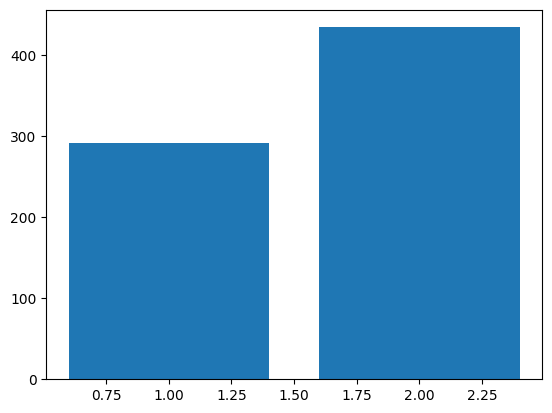

In [ ]:
# @title  1. Singular Values give you the  "topic" importance
plt.bar([1,2],Ss);

# 2. The embedding space ($k=2$)

- Unlike before, it is now **continuous, short and dense**
- The space encodes some notion of similarities between words
- Cosine similarity makes more sense


Note this embedding space computed with `CountVector` is not great, probably each new embedding is "dominated" by the word frequency in the dataset. See how the word jpeg (most frequent) has higher norm (more at the boundary).

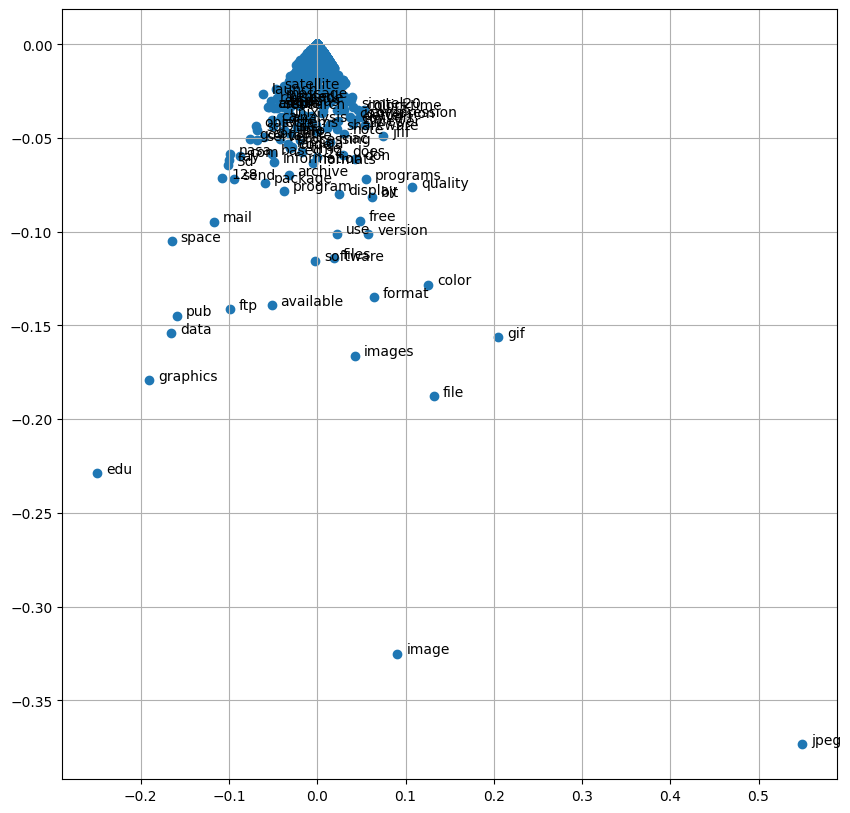

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
clip = 0
ax.scatter(*Vts);
vocab = count_vect.get_feature_names_out()
for count, ((x,y), txt) in enumerate(zip(Vts.T, vocab)):
    if np.linalg.norm([x,y]) > .5e-1:
        ax.annotate(txt, (x+0.01, y))
if clip:
    plt.ylim(-0.175, -0.030)
    #plt.ylim(0.05, 0.15)
plt.grid('off')

# 3. We can associate each new $k$ component (topic) with most important words

<br><br>
<div align='center'><img src="https://github.com/iacopomasi/NLP/blob/main/course/AA2324/2_01_lsa_intro_word2vec/figs/mysvd.png?raw=true" width='65%' ></div>

# 3. We can associate each new $k$ component (topic) with most important words using $\mbf{V}_k$
<br><div align='center'><img src="https://github.com/iacopomasi/NLP/blob/main/course/AA2324/2_01_lsa_intro_word2vec/figs/mysvd2.png?raw=true" width='65%' ></div>

### **EXERCISE 7** 💻
Select the first latent topic and plot/print:

1. The most important 10 words tokens that contribute **positively** to that latent topic
2. The most important 10 words tokens that contribute **negatively** to that latent topic

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution
k = 0 #first component, first topic
word_per_topic = 10
topic = [vocab[idx_word] for idx_word in np.argsort(Vts[k,:])[:-word_per_topic-1:-1]]
topic_weight = np.sort(Vts[k,:])[:-word_per_topic-1:-1]
topic_neg = [vocab[idx_word] for idx_word in np.argsort(Vts[k,:])[:word_per_topic:]]

print(f'Words positive for k={k} are {topic}')
print(f'Words negative for k={k} are {topic_neg}')

Words positive for k=0 are ['jpeg', 'gif', 'file', 'color', 'quality', 'image', 'jfif', 'format', 'bit', 'version']
Words negative for k=0 are ['edu', 'graphics', 'data', 'space', 'pub', 'mail', '128', '3d', 'ray', 'nasa']


# How to think about the new embedding space

If you reduce the dimension from 3 to 2, you may think that the embedding is learning something like:

$$[\text{car}, \text{truck}, \text{flower}] \longrightarrow [(1.3452 * \text{car} + 0.2828 * \text{truck}), \text{flower}]$$

# 4. Dimensionality Reduction:
## Projecting a document into lower-dimensional space

We treat the document as a vector $\mbf{d}$ that lives in a $V$ dimensional space.
- We want to use the output of SVD to project $\mbf{d}$ from V dimension to $k$ where $k\ll V$.
- Usually $k$ is the order of hundreds.

We take the matrix $\mbf{V}_k$ of the SVD decomposition that has dimension $k\times V$ (this makes sense because $\mbf{d}$ lives in the same $V$-D space too).
$$ \mbf{d}_k = \underbrace{\mbf{V}_k^{\top}}_{k\times V}\underbrace{\mbf{d}}_{V}$$

**The new $\mbf{d}_k$ is now short and dense**

## Gensim LSA or LSI

https://radimrehurek.com/gensim/models/lsimodel.html

# Now Let's switch and play with word2vec

There are many version of word embeddings, trained on different corpus or in different ways (word2vec vs Glove vs fasttext).
Let us us the followin word2vec, a word2vec trained on entire Google News dataset, of about **100 billion words.**

the tag name is `word2vec-google-news-300`

Model is 1.6GB so it will take time to download (it will show progress bar)! ⚠



# Word Embeddings (word2vec)

## Show available models in Gensim

You need Gensim Downloader

```python import gensim.downloader```

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import numpy as np

In [ ]:
np.__version__
import gensim.downloader

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import gensim.downloader
# Show all available models in gensim-data
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

## Let us get `word2vec-google-news-300`
⏲ it will take a while

In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
# [==================================================] 100.0% 1662.8/1662.8MB downloaded

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### **EXERCISE 8** 💻
Print the size of the vocabulary

_Hint: Search gensim documentation or help(wv)_

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
N = len(wv.index_to_key)
print(f'vocabulary size is {N}')

vocabulary size is 3000000


'Your code here'

### **EXERCISE 9** 💻

Show the first 10 words of the vocabulary

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution
for index, word in enumerate(wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index} over {N} is {word}")

word #0 over 3000000 is </s>
word #1 over 3000000 is in
word #2 over 3000000 is for
word #3 over 3000000 is that
word #4 over 3000000 is is
word #5 over 3000000 is on
word #6 over 3000000 is ##
word #7 over 3000000 is The
word #8 over 3000000 is with
word #9 over 3000000 is said


### **EXERCISE 10** 💻

Accessing the word embedding `king` and plot the dense vector with matplotlib

What is the dimensionality of the word embedding?

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution
vec_king = wv['king']
print(f'vector shape is {vec_king.shape}')

vector shape is (300,)


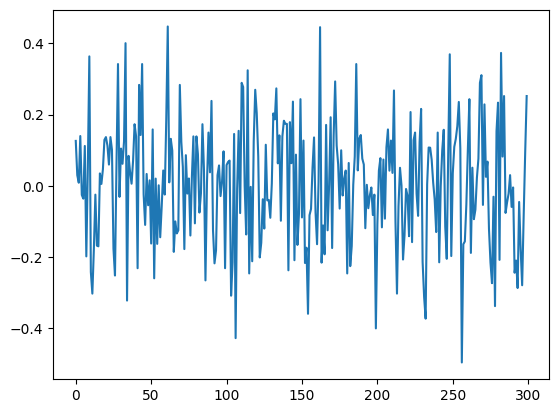

In [ ]:
plt.plot(vec_king);

⚠ Watch out if you do not pass before through the vocabulary before asking the model ⚠

try to access the word `cameroon`  What happens?

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution
try:
    vec_cameroon = wv['cameroon']
except KeyError:
    print("The word 'cameroon' does not appear in this model")

# Word similarities!

Word embeddings can provide some notion of **semantic similarities between words**

You can use the `wv.similarity(w1, w2)` function to compare two words `w1,w2`

In [ ]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
    ('car', 'cartoon'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06
'car'	'cartoon'	0.03


# Find the most similar words given queries

In [ ]:
wv.most_similar(positive=['car', 'minivan'], topn=5)

[('SUV', 0.8532192707061768),
 ('vehicle', 0.8175783753395081),
 ('pickup_truck', 0.7763688564300537),
 ('Jeep', 0.7567334175109863),
 ('Ford_Explorer', 0.7565720081329346)]

# Outlier detection

It can also detect words that semantically do not belong to a pool of other words

In [ ]:
wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car'])

'car'

# Analogy using the learned embedding space

- word2vec learns relationships between words automatically
- Arithmetic of the vectors has **surprising properties!**

`a is to b as a* is to what?`

`Man is to King as Woman is to ______`

### Algebric way

$$\bmf{\theta}_W(\text{king}) - \bmf{\theta}_W(\text{man}) + \bmf{\theta}_W(\text{woman}) \approx \bmf{\theta}_W(\text{queen})$$

# Analogy using the learned embedding space
### Geometric way (parallelogram model)
<div align='center'><img src="https://github.com/iacopomasi/NLP/blob/main/course/AA2324/2_01_lsa_intro_word2vec/figs/word2vec_analogy.png?raw=1" width='35%' ></div>

# Analogy using the learned embedding space
### Optimization
$$ \mbf{a}:\mbf{b} = \mbf{a}^{\star}: \mbf{b}^{\star} (?) $$

$$ \mbf{b}^{\star} = \arg\max_{\mbf{x}} \text{sim}(\mbf{x},\mbf{b}-\mbf{a}+\mbf{a}^{\star})$$

<div align='center'><img src="https://github.com/iacopomasi/NLP/blob/main/course/AA2324/2_01_lsa_intro_word2vec/figs/word2vec_analogy.png?raw=1" width='35%' ></div>

# Analogy

### **EXERCISE 11** 💻

Define a function `analogy` that using word2vec gensim API can perform analogies between words.

_Hints: use most similar with positive and negatives_



In [ ]:
def analogy(x1, x2, y1):
    pass

In [ ]:
# @title 👀 Solution
def analogy(x1, x2, y1):
    result = wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

## Try it out!

In [ ]:
analogy('man', 'king', 'woman')

'queen'

In [ ]:
analogy('australia', 'beer', 'france')
# does not work well with Glove should give you champagne

'beers'

In [ ]:
analogy('obama', 'clinton', 'reagan')

'kerry'

In [ ]:
analogy('tall', 'tallest', 'long')

'longest'

In [ ]:
analogy('good', 'fantastic', 'bad')

'horrible'

# Other Exercises

### Objective:

The goal of these exercises is to deepen your understanding of word vectors (also known as word embeddings) by performing a series of tasks that involve manipulating and analyzing these vectors. Word vectors are a fundamental concept in natural language processing (NLP) and underpin many modern AI models and applications.

## 1. Words Similarity

### **EXERCISE 12** 💻
Compute cosine similarities between the following words
pairs = [('king', 'queen'), ('Paris', 'France'), ('apple', 'orange')]

You have to implement the cosine similarity by hand.

In [ ]:
# @title 🧑🏿‍💻 Your code here
# Compute cosine similarities
pairs = [('king', 'queen'), ('Paris', 'France'), ('apple', 'orange')]

def cosine_similarity(vec1, vec2):
    '''
    Your Code
    '''
    return 0

# Test the cosine_similarity function
for word1, word2 in pairs:
    similarity = cosine_similarity(wv[word1], wv[word2])
    print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.2f}")

Cosine similarity between 'king' and 'queen': 0.00
Cosine similarity between 'Paris' and 'France': 0.00
Cosine similarity between 'apple' and 'orange': 0.00


In [ ]:
# @title 👀 Solution
def cosine_similarity(vec1, vec2):
  return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

for word1, word2 in pairs:
  similarity = cosine_similarity(wv[word1], wv[word2])
  print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.2f}")

Cosine similarity between 'king' and 'queen': 0.65
Cosine similarity between 'Paris' and 'France': 0.63
Cosine similarity between 'apple' and 'orange': 0.39


## 2. Words Clustering

In [ ]:
words = ['dog', 'cat', 'apple',  'pear', 'pie', 'pasta', 'orange', 'king', 'queen',
         'car', 'bicycle', 'Paris', 'London', 'happy', 'sad', 'big', 'small', 'fast',
         'slow', 'hot', 'cold', 'bright', 'dark']

In [ ]:
# @title 🧑🏿‍💻 Your code here
import numpy as np
from sklearn.cluster import KMeans
# Select words and extract their vectors
word_vectors = np.array([wv[word] for word in words])

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
clusters_dict = {}

# Cluster word vectors and fill the dictionary
'''
Your Code
'''

for cluster, cl_words in enumerate(clusters_dict.values()):
    print(f"Cluster {cluster}: {cl_words}")

In [ ]:
# @title 👀 Solution
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
kmeans = kmeans.fit(word_vectors)
clusters = kmeans.labels_

# then we can iterate over the clusters
clusters_dict = {}
for i, cluster in enumerate(clusters):
    if cluster not in clusters_dict:
        clusters_dict[cluster] = []
    clusters_dict[cluster].append(words[i])

for cluster, cl_words in enumerate(clusters_dict.values()):
    print(f"Cluster {cluster}: {cl_words}")

### **EXERCISE 13** 💻 Vector Space Visualization

Let's visualize the word vectors from the previous exercise on a 2D Plot.

In [ ]:
# @title 🧑🏿‍💻 Your code here
# To do so, we must first reduce the number of dimensions (you may use PCA or T-SNE)
'''
Your Code
'''

'\nYour Code\n'

In [ ]:
# @title 🧑🏿‍💻 Your code here
# Then, we can plot them using Matplotlib.
'''
Your Code
'''

'\nYour Code\n'

In [ ]:
# @title 👀 Solution
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions
pca = PCA(n_components=2, random_state=0)
word_vectors_2d = pca.fit_transform(word_vectors)
# Plot
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

### **EXERCISE 14** 💻 Sentiment Analysis

### Objective

The goal of this exercise is to introduce you to a basic form of sentiment analysis by leveraging word vectors. You will develop a Python script that analyzes the sentiment of text data by counting the number of terms classified as positive or negative based on their similarity to known positive and negative words.

### Background

Sentiment analysis is a common task in natural language processing (NLP) that involves determining the emotional tone behind a body of text. This is a basic form of sentiment analysis focusing on the occurrence of explicitly positive or negative terms, enhanced by the semantic understanding provided by word vectors.

### Tasks

1. Preparation:
  - Choose a pre-trained word vector model from any library (e.g., Gensim with Word2Vec, GloVe, or FastText embeddings).
  Define a small set of seed words for positive and negative sentiments (e.g., positive: ["happy", "joyful", "excited"], negative: ["sad", "angry", "frustrated"]).
2. Sentiment Analysis Function:
  - Write a Python function analyze_sentiment(text, model, positive_seeds, negative_seeds) that takes a string of text and the sets of seed words as input and returns the sentiment of the text as either "Positive", "Negative", or "Neutral".
  - The function should tokenize the input text into words, extract nouns, and for each noun in the text, use the word vector model to find its closest match in the set of seed words (based on cosine similarity).
  - Count how many times words in the text are most similar to the positive seed words versus the negative seed words.
  - Determine the overall sentiment based on which type of seed words, positive or negative, has the most matches.
3. Analysis:
  - Test your function on at least three different sentences of varying sentiment (e.g., clearly positive, clearly negative, and neutral or mixed sentiment).
  - Discuss the effectiveness of this method for sentiment analysis. Consider its limitations and potential improvements.

In [ ]:
def sent_analysis_test():

  positive_seeds = [] # TODO: choose your seeds
  negative_seeds = [] # TODO: choose your seeds

  # Test sentences
  test_sentences = [
      "I am very happy and excited about the new opportunities.",
      "I am sad and frustrated with the current situation.",
      "It's the best day of my life.",
      "The joyful parade made everyone incredibly happy.",
      "The sad news left the community in a state of sorrow.",
      "Today is just an ordinary day.",
      "Great, another rainy day. Just what I needed to make my weekend perfect.",
      "Oh wonderful, my favorite show got canceled. What a fantastic way to start the day!"
  ]

  for sentence in test_sentences:
      sentiment = analyze_sentiment(sentence, wv, positive_seeds, negative_seeds)
      print(f"Sentence: '{sentence}'\nSentiment: {sentiment}\n")

In [ ]:
# @title 🧑🏿‍💻 Your code here
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import numpy as np
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def analyze_sentiment(text, model, positive_seeds, negative_seeds):
    # Tokenize the input text
    tokens = word_tokenize(text.lower())

    # Tag tokens
    tagged_tokens = pos_tag(tokens)

    # Filter tokens to include only nouns (NN, NNP, NNS, NNPS)
    '''
    Your Code
    '''

    # Initialize counters
    positive_count, negative_count = 0, 0

    # Count positive and negative nouns
    '''
    Your Code
    '''

    # Determine overall sentiment
    if positive_count > negative_count:
        return "Positive"
    elif positive_count < negative_count:
        return "Negative"
    else:
        return "Neutral"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# run to test your solution
sent_analysis_test()

Sentence: 'I am very happy and excited about the new opportunities.'
Sentiment: Neutral

Sentence: 'I am sad and frustrated with the current situation.'
Sentiment: Neutral

Sentence: 'It's the best day of my life.'
Sentiment: Neutral

Sentence: 'The joyful parade made everyone incredibly happy.'
Sentiment: Neutral

Sentence: 'The sad news left the community in a state of sorrow.'
Sentiment: Neutral

Sentence: 'Today is just an ordinary day.'
Sentiment: Neutral

Sentence: 'Great, another rainy day. Just what I needed to make my weekend perfect.'
Sentiment: Neutral

Sentence: 'Oh wonderful, my favorite show got canceled. What a fantastic way to start the day!'
Sentiment: Neutral



In [ ]:
# @title 👀 Solution

from nltk.tokenize import word_tokenize
from nltk import pos_tag
import numpy as np
import nltk

def sent_analysis_test():

  positive_seeds = ["happy", "joyful", "excited"]
  negative_seeds = ["sad", "angry", "frustrated"]

  # Test sentences
  test_sentences = [
      "I am very happy and excited about the new opportunities.",
      "I am sad and frustrated with the current situation.",
      "It's the best day of my life.",
      "The joyful parade made everyone incredibly happy.",
      "The sad news left the community in a state of sorrow.",
      "Today is just an ordinary day.",
      "Great, another rainy day. Just what I needed to make my weekend perfect.",
      "Oh wonderful, my favorite show got canceled. What a fantastic way to start the day!"
  ]

  for sentence in test_sentences:
      sentiment = analyze_sentiment(sentence, wv, positive_seeds, negative_seeds)
      print(f"Sentence: '{sentence}'\nSentiment: {sentiment}\n")


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def analyze_sentiment(text, model, positive_seeds, negative_seeds):
    # Tokenize the input text
    tokens = word_tokenize(text.lower())

    # Tag tokens
    tagged_tokens = pos_tag(tokens)

    # Filter tokens to include only nouns (NN, NNP, NNS, NNPS)
    nouns = [word for word, tag in tagged_tokens if tag in ('NN', 'NNP', 'NNS', 'NNPS')]

    # Initialize counters
    positive_count, negative_count = 0, 0

    # Count positive and negative nouns
    for noun in nouns:
        if noun in model.key_to_index:
            # Compute similarities to seed words
            positive_similarities = [model.similarity(noun, seed) for seed in positive_seeds]
            negative_similarities = [model.similarity(noun, seed) for seed in negative_seeds]

            # Sum the similarities for each sentiment
            if max(positive_similarities) > max(negative_similarities):
                positive_count += 1
            elif max(positive_similarities) < max(negative_similarities):
                negative_count += 1

    # Determine overall sentiment
    if positive_count > negative_count:
        return "Positive"
    elif positive_count < negative_count:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
# @title 👀 Solution
sent_analysis_test() # Notice any problems?